In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.optimize import minimize 
from numpy.linalg import inv

EJERCICIO 3

In [40]:
m = 10000
coeficientes_conz = []
coeficionetes_sinz = []
corr_con_x1 = []
corr_con_x2 = [] 

for q in range(m+1):
    n = 30
    X1 = stats.uniform.rvs(loc= 0, scale = 1, size = n)
    X2 = stats.uniform.rvs(loc= 0, scale = 1, size = n)
    u = stats.norm.rvs(0, 1, size=n)
    Z = X1 + u
    epsilon = stats.norm.rvs(0, 1, size=n)

    Y = X1 + X2 + Z + epsilon

    X = np.column_stack((X1, X2, Z))
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
    coeficientes_conz.append(beta_hat)
    Y_pred = X @ beta_hat
    epsilon_ = Y - Y_pred

    otraX = np.column_stack((X1, X2))
    beta_hat2 = np.linalg.inv(otraX.T @ otraX) @ otraX.T @ Y
    coeficionetes_sinz.append(beta_hat2)
    Y_pred2 = otraX @ beta_hat2
    epsilon2_ = Y - Y_pred2

    correlation_matrix_x1 = np.corrcoef(Z, X1)
    correlation_matrix_x2 = np.corrcoef(Z, X2)

    corr_con_x1.append(correlation_matrix_x1[0,1])
    corr_con_x2.append(correlation_matrix_x2[0,1])



In [41]:
con_x1 = np.mean(corr_con_x1)
con_x2 = np.mean(corr_con_x2)

print("corr con x1 " + str(con_x1))
print("corr con x2 " + str(con_x2)) #deberia ser mayor a cero

corr con x1 0.2743628382907114
corr con x2 0.0016188380700496135


para el sesgo uso  que E(b_hat) - beta = sesgo, y que la esperanza de los betas es el promedio porque tienen distribucion normal


In [49]:
b1 = []
b2 = []

for arr in coeficionetes_sinz:    
    b1.append(arr[0])
    b2.append(arr[1])

bias1 = np.mean(b1) - 1
bias2 = np.mean(b2) - 1

print(bias1)
print(bias2)

0.9962671934549849
0.004146077760420086


In [47]:
b1_ = []
b2_ = []

for arr in coeficientes_conz:
    b1_.append(arr[0])
    b2_.append(arr[1])



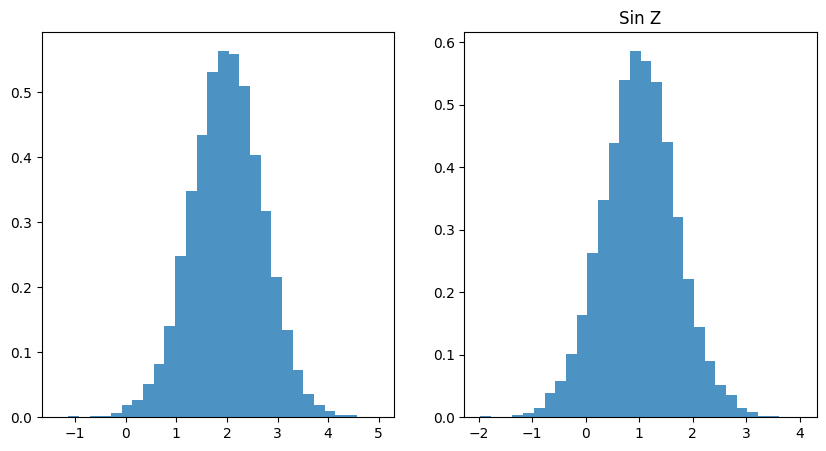

In [51]:
fig, axs  = plt.subplots(1,2, figsize=(10,5))
axs[0].hist(b1, density=True, alpha=.8, bins = 30)
axs[1].hist(b2, density=True, alpha=.8, bins = 30)
plt.title("Sin Z")
plt.show()



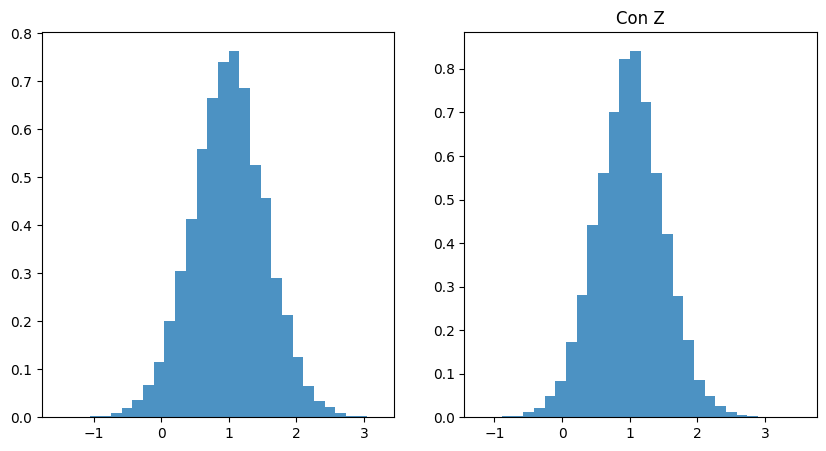

0.0008541091214295804
0.002746667371376299


In [52]:
fig, axs  = plt.subplots(1,2, figsize=(10,5))
axs[0].hist(b1_, density=True, alpha=.8, bins = 30)
axs[1].hist(b2_, density=True, alpha=.8, bins = 30)
plt.title("Con Z")
plt.show()

bias1_ = np.mean(b1_) - 1
bias2_ = np.mean(b2_) - 1

print(bias1_)
print(bias2_)

los mas insesgados son los del modelo que incluye z